# **Import Library**

In [2]:
import pandas as pd
import numpy as np

#Modeling 
from sklearn.linear_model import LinearRegression

#visualization
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt



# **DataSet**

In [3]:
Emerg_call = pd.read_csv('/content/911.csv')
Emerg_call

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


# **Data** **Processing**

In [4]:
Emrg_callCopy = Emerg_call.copy()

Rename Columns

In [5]:
Emrg_callCopy = Emrg_callCopy.rename(columns={'lat':'Latitude','lng':'Longitude','desc':'Description'
,'zip':'Zipcode','twp':'Township','addr':'Address'}, inplace = False)

In [6]:
Emrg_callCopy.head()

,Latitude,Longitude,Description,Zipcode,title,timeStamp,Township,Address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
Emrg_callCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Latitude     663522 non-null  float64
 1   Longitude    663522 non-null  float64
 2   Description  663522 non-null  object 
 3   Zipcode      583323 non-null  float64
 4   title        663522 non-null  object 
 5   timeStamp    663522 non-null  object 
 6   Township     663229 non-null  object 
 7   Address      663522 non-null  object 
 8   e            663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [8]:
Emrg_callCopy.isna().sum()

Latitude           0
Longitude          0
Description        0
Zipcode        80199
title              0
timeStamp          0
Township         293
Address            0
e                  0
dtype: int64

Data Clean " Nan "

In [9]:
Emrg_callCopy['Zipcode'] = Emrg_callCopy['Zipcode'].fillna("Unknown")
Emrg_callCopy['Township'] = Emrg_callCopy['Township'].fillna('Unknown')

In [10]:
Emrg_callCopy.isna().sum()

Latitude       0
Longitude      0
Description    0
Zipcode        0
title          0
timeStamp      0
Township       0
Address        0
e              0
dtype: int64

In [12]:
Emrg_callCopy.describe()

,Latitude,Longitude,e
count,663522.000000,663522.000000,663522.0
mean,40.158162,-75.300105,1.0
std,0.220641,1.672884,0.0
min,0.000000,-119.698206,1.0
25%,40.100344,-75.392735,1.0
50%,40.143927,-75.305143,1.0
75%,40.229008,-75.211865,1.0
max,51.335390,87.854975,1.0


Number of the Address ,Township and Zipcode

In [13]:
print('')
print('ADDRESS')
print('')

Addr = Emrg_callCopy['Address'].value_counts()
print(Addr)

print('_'*50)
print('_'*50)
print('')

print('TOWNSHIP')
print('')

Twns = Emrg_callCopy['Township'].value_counts()
print(Twns)

print('_'*50)
print('_'*50)
print('')

print('ZIPCODE')
print('')

Zpc = Emrg_callCopy['Zipcode'].value_counts()
print(Zpc)


ADDRESS

SHANNONDELL DR & SHANNONDELL BLVD    7285
MAIN ST & OLD SUMNEYTOWN PIKE        2576
THE FAIRWAY  & RYDAL RD              1986
EAGLEVILLE RD & SUNDERLAND DR        1618
EVERGREEN RD & W LIGHTCAP RD         1591
                                     ... 
RAINHILL FIRE CO                        1
SONI DR & LONG MEADOW RD                1
WILLOW LN & CARMELLA LN                 1
WILLOW                                  1
VIKING RD & FLINT HILL RD               1
Name: Address, Length: 41292, dtype: int64
__________________________________________________
__________________________________________________

TOWNSHIP

LOWER MERION     55490
ABINGTON         39947
NORRISTOWN       37633
UPPER MERION     36010
CHELTENHAM       30574
                 ...  
BRYN ATHYN        1254
GREEN LANE         385
Unknown            293
PHILA COUNTY       267
LEHIGH COUNTY      190
Name: Township, Length: 69, dtype: int64
__________________________________________________
___________________________

### **Explorating by Visualization**

First some basic questions:


*   From where the most calls come?
*   What is the reason for most calls?
*   How many calls for the month ?
*   Which Least calls areas ? and  Which Most calls areas?











# **From where the most calls come?**

In [14]:
Emrg_callCopy['Station_number'] = Emrg_callCopy.Description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
Emrg_callCopy.head(2)

,Latitude,Longitude,Description,Zipcode,title,timeStamp,Township,Address,e,Station_number
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345


In [15]:
Emrg_callCopy.Station_number.value_counts()[:15]

 308A    25346
 329     21895
 313     20325
 381     15949
 345     14504
 308     13963
 351     12705
 345B    12165
 317     11802
 382     11169
 322A    10622
 308B     9128
 339      8066
 384      7781
 344      7769
Name: Station_number, dtype: int64

<BarContainer object of 10 artists>

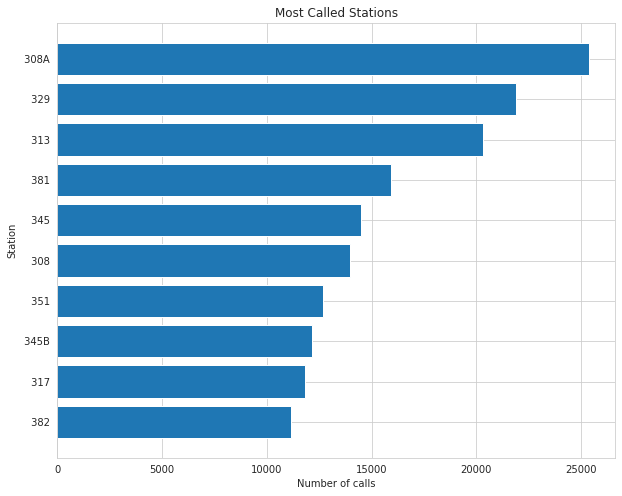

In [16]:
Stat_num = Emrg_callCopy.Station_number.value_counts()[:10]

plt.figure(figsize=(10, 8))
x = list(Stat_num.index)
y = list(Stat_num.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.xlabel("Number of calls")
plt.ylabel("Station")

plt.barh(x, y)
#sns.countplot(x =  Emrg_callCopy.Station_number , data= Emrg_callCopy , hue= 'Station_number')

So, Most of the calls come from stations : 308A , 329, 313

# **What is the reason for most calls?**

In [19]:
Emrg_callCopy.title.value_counts()[:10]

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
EMS: CARDIAC EMERGENCY          32332
EMS: VEHICLE ACCIDENT           25513
Traffic: ROAD OBSTRUCTION -     23235
EMS: SUBJECT IN PAIN            19646
EMS: HEAD INJURY                18301
Name: title, dtype: int64

In [17]:

Emrg_callCopy['Reason']=Emrg_callCopy['title'].apply(lambda x:x.split(':')[0])
Emrg_callCopy.head(3)

,Latitude,Longitude,Description,Zipcode,title,timeStamp,Township,Address,e,Station_number,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,:STA27,Fire


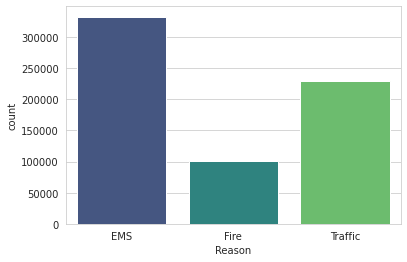

In [18]:
sns.countplot(x = 'Reason' , data=Emrg_callCopy , palette='viridis')

# **How many calls for the month ?**

In [23]:
Emrg_callCopy['timeStamp'] = pd.to_datetime(Emrg_callCopy.timeStamp)
Emrg_callCopy.timeStamp

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [24]:
Emrg_callCopy['Hour'] = Emrg_callCopy.timeStamp.dt.hour
Emrg_callCopy['Month'] = Emrg_callCopy.timeStamp.dt.month
Emrg_callCopy['Day_of_Week'] = Emrg_callCopy.timeStamp.dt.weekday
Emrg_callCopy.head(3)

,Latitude,Longitude,Description,Zipcode,title,timeStamp,Township,Address,e,Station_number,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,:STA27,Fire,14,12,3


In [25]:
Ds = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
Emrg_callCopy['Day_of_Week'] = Emrg_callCopy.Day_of_Week.map(Ds)
Emrg_callCopy.Day_of_Week.value_counts()

Thu    102942
Tue     99157
Wed     98683
Mon     97684
Sun     96745
Fri     89452
Sat     78859
Name: Day_of_Week, dtype: int64

In [26]:
ByMonth = Emrg_callCopy.groupby('Month').count()
ByMonth.head(3)

,Latitude,Longitude,Description,Zipcode,title,timeStamp,Township,Address,e,Station_number,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,,
1,62336,62336,62336,62336,62336,62336,62336,62336,62336,40057,62336,62336,62336
2,55427,55427,55427,55427,55427,55427,55427,55427,55427,36421,55427,55427,55427
3,60027,60027,60027,60027,60027,60027,60027,60027,60027,39124,60027,60027,60027


In [27]:
#plt.figure(figsize=(12, 8))
#sns.lmplot(x='Month',y='Township',data=ByMonth.reset_index())

In [28]:
x = np.array(ByMonth['Hour'])
y = np.array(ByMonth['Day_of_Week'])

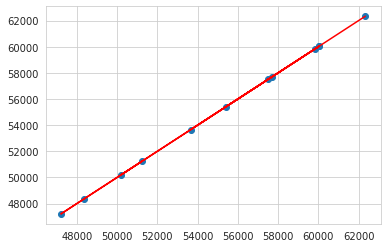

In [29]:
model = LinearRegression()
x_train= x.reshape(-1, 1)
y_train= y.reshape(-1, 1)
model.fit(x_train,y_train)
plt.scatter(x_train, y_train)
plt.plot(x_train,model.predict(y_train), 'r')
plt.show()

# **Which least calls areas ? and  Which most calls areas?**

In [37]:
twnsh = Emrg_callCopy.Township.value_counts()[:10]
twnsh

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: Township, dtype: int64

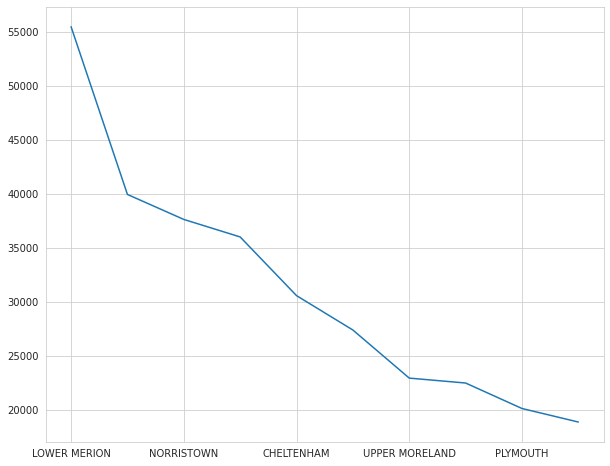

In [38]:
twnsh.plot(figsize=(10, 8))